## Image Matching

Image matching is an important concept in computer vision and object recognition. The images of the same subject can be acquired from different angles, lighting and scales. Therefore, it is best to find features that are descriptive and invariant to the aforementioned variations in order to categorize the images correctly.

SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from natsort import natsorted
import pandas as pd
from collections import Counter

In [91]:
file1 = open("/Users/Miloni Mittal/Desktop/Acads Stuff/Fourth Year/ML/Class Project/temp.txt", "w")
path1 = '/Users/Miloni Mittal/Desktop/Acads Stuff/Fourth Year/ML/Class Project/classProject01'
df = pd.DataFrame(columns = ['Img1_Name', 'Img2_Name', 'Person1_ID', 'Person2_ID', "Genuine?", "Score"])

sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #print(img1)
    img1 = cv2.imread(img1)
    kp1, des1 = sift.detectAndCompute(img1,None)
    if len(kp1)>0:
        for image in natsorted(os.listdir(path1)):
            img2 = os.path.join(path1, image)
        #print(img2)
            str2 = str(image)
            if (img1 != img2): # queryImage
                img2 = cv2.imread(img2) # trainImage
                kp2, des2 = sift.detectAndCompute(img2,None)
            # Initiate SIFT detector
            #sift = cv2.SIFT()            
            # find the keypoints and descriptors with SIFT
            # BFMatcher with default params
                if (len(kp1)!=0 and len(kp2)!=0 and len(kp1)!=1 and len(kp2)!=1):
                    matches12 = bf.knnMatch(des1,des2, k=2)
#                     dis = bf.match(des1,des2)
                    matches21 = bf.knnMatch(des2,des1, k=2)
                #----------------------------------------------
                    number_keypoints = 0
                    if len(kp1) <= len(kp2):
                        number_keypoints = len(kp1)
                    else:
                        number_keypoints = len(kp2)
                    good12 = []
                    good21 = []
                    for m,n in matches12:
                        if m.distance < 0.7*n.distance:
                            good12.append([m])
                    for m,n in matches21:
                        if m.distance < 0.7*n.distance:
                            good21.append([m])
                #print("Keypoints 1ST Image: " + str(len(kp1)))
                #print("Keypoints 2ND Image: " + str(len(kp2)))
                #print("GOOD Matches:", len(good))
                    score = min(len(good12)/number_keypoints, len(good21)/number_keypoints)
                    ID1=str1.split("_")[0]
                    ID2=str2.split("_")[0]
                    new_row={'Img1_Name':str1, 'Img2_Name':str2, 'Person1_ID':ID1 ,'Person2_ID':ID2 ,"Genuine?":ID1==ID2, 'Score':score}
                    df = df.append(new_row, ignore_index = True) 
                #print("How good it's the match: ", score) #* 100, "%")
                    file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                    print(str1 + " " + str2 + " " + str(score)) # replace with 'cos' if using cosine similarity
file1.close()

C:\Users\Miloni Mittal\Anaconda3\ANACONDA\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


1_P1_S1_1.jpg 1_P1_S1_1.jpg 1.0
1_P1_S1_1.jpg 1_P1_S1_2.jpg 0.0
1_P1_S1_1.jpg 1_P1_S1_3.jpg 0.0
1_P1_S1_1.jpg 1_P1_S1_4.jpg 0.0
1_P1_S1_1.jpg 1_P1_S1_5.jpg 0.04
1_P1_S1_1.jpg 1_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 1_P1_S2_2.jpg 0.125
1_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 1_P1_S2_4.jpg 0.0
1_P1_S1_1.jpg 1_P1_S2_5.jpg 0.07692307692307693
1_P1_S1_1.jpg 1_P2_S1_1.jpg 0.0
1_P1_S1_1.jpg 1_P2_S1_2.jpg 0.04
1_P1_S1_1.jpg 1_P2_S1_3.jpg 0.0
1_P1_S1_1.jpg 1_P2_S1_4.jpg 0.0
1_P1_S1_1.jpg 1_P2_S1_5.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_1.jpg 0.04
1_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_4.jpg 0.0
1_P1_S1_1.jpg 1_P2_S2_5.jpg 0.0
1_P1_S1_1.jpg 2_P1_S1_1.jpg 0.0
1_P1_S1_1.jpg 2_P1_S1_2.jpg 0.0
1_P1_S1_1.jpg 2_P1_S1_3.jpg 0.0625
1_P1_S1_1.jpg 2_P1_S1_4.jpg 0.0
1_P1_S1_1.jpg 2_P1_S1_5.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_4.jpg 0.0
1_P1_S1_1.jpg 2_P1_S2_5.jpg 0.0
1_P1_S1_1.jpg 2_

KeyboardInterrupt: 

In [ ]:
df.to_csv('run1.csv')

In [2]:
df=pd.read_csv('run1.csv')

In [3]:
df.head()

,Unnamed: 0,Img1_Name,Img2_Name,Person1_ID,Person2_ID,Genuine?,Score
0,0,1_P1_S1_1.jpg,1_P1_S1_1.jpg,1,1,True,1.00
1,1,1_P1_S1_1.jpg,1_P1_S1_2.jpg,1,1,True,0.00
2,2,1_P1_S1_1.jpg,1_P1_S1_3.jpg,1,1,True,0.00
3,3,1_P1_S1_1.jpg,1_P1_S1_4.jpg,1,1,True,0.00
4,4,1_P1_S1_1.jpg,1_P1_S1_5.jpg,1,1,True,0.04


In [4]:
ct=0
df=df[df['Score'] != 1.0]
       
for i in list(set(df['Img1_Name'])):
    df_temp=df[df['Img1_Name']==i]
    maxScore=max(df_temp['Score'])
    maxScore_indices = [k for k, x in enumerate(df_temp['Score']) if x == maxScore]
    for j in maxScore_indices:
        if (str(df_temp.iloc[j]['Person2_ID'])==i.split('_')[0]):            
            ct=ct+1
            break
print("CRR = "+ str(ct/len(list(set(df['Img1_Name'])))))

CRR = 0.3944954128440367


In [5]:
genuine=[df['Score'][i] for i in df.index if df['Genuine?'][i]]
imposter=[df['Score'][i] for i in df.index if df['Genuine?'][i]==False]
genuine_counter=Counter(genuine)
imposter_counter=Counter(imposter)
genuine_counter.pop(0)
imposter_counter.pop(0)

229380

In [6]:
genuine_max=max(list(genuine_counter.values()))
imposter_max=max(list(imposter_counter.values()))

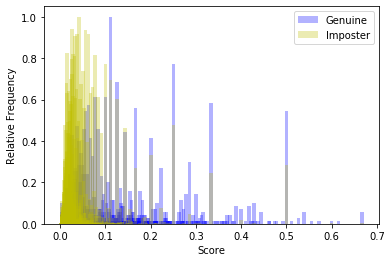

In [7]:
# genuine_imposter_hist
plt.bar(list(genuine_counter.keys()), np.array(list(genuine_counter.values()))/genuine_max,color='b',width=0.008, alpha=0.3, label='Genuine')
plt.bar(list(imposter_counter.keys()), np.array(list(imposter_counter.values()))/imposter_max, color='y',width=0.008, alpha=0.3, label='Imposter')
plt.xlabel('Score') 
plt.ylabel('Relative Frequency')
plt.legend()
plt.savefig('run1 genuine_imposter_hist.png')

In [8]:
df_th=df.copy()
threshold_list=np.round_(np.arange (0.001, 1, 0.002), decimals = 3) 
for th in threshold_list:
    th_str=str(th)
    true_index_list=df_th.Score[df_th.Score>th].index
    df_th['Th='+th_str]=False
    df_th.loc[true_index_list,'Th='+th_str] = True

In [9]:
dict_th={}
dict_eer={}
neg=len(df_th[df_th['Genuine?'] == False])
pos=len(df_th[df_th['Genuine?'] == True])  
graph_fp=[]
graph_tp=[]
graph_far=[]
graph_frr=[]
for th in threshold_list:
    count_fp=0
    count_tp=0
    count_far=0
    count_frr=0
    th_str=str(th)
    genuine_np= np.array(df_th['Genuine?'])
    th_np=np.array(df_th['Th='+th_str])
    
    
    fp=np.logical_and(genuine_np==False,th_np==True)
    unique, counts = np.unique(fp, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_fp=dict(zip(unique, counts))[True]
    else:
        count_fp=0
    
    tp=np.logical_and(genuine_np==True,th_np==True)
    unique, counts = np.unique(tp, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_tp=dict(zip(unique, counts))[True]
    else:
        count_tp=0
    
    far=np.logical_and(genuine_np==False,th_np==True)
    unique, counts = np.unique(far, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_far=dict(zip(unique, counts))[True]
    else:
        count_far=0
    
    frr=np.logical_and(genuine_np==True,th_np==False)
    unique, counts = np.unique(frr, return_counts=True)
    if True in dict(zip(unique, counts)):
        count_frr=dict(zip(unique, counts))[True]
    else:
        count_frr=0
    
    dict_th[th]=[count_fp/neg,count_tp/pos]
    graph_fp.append(dict_th[th][0])
    graph_tp.append(dict_th[th][1])
    dict_eer[th]=[count_far/neg,count_frr/pos]
    graph_far.append(dict_eer[th][0])
    graph_frr.append(dict_eer[th][1])

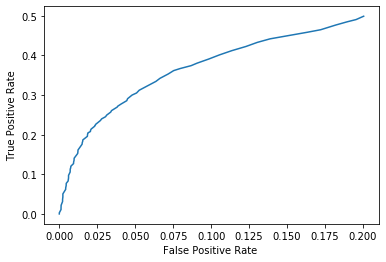

In [10]:
# tp_fp
plt.plot(graph_fp, graph_tp) 
plt.xlabel('False Positive Rate ') 
plt.ylabel('True Positive Rate')
plt.savefig('run1 tp_fp.png')

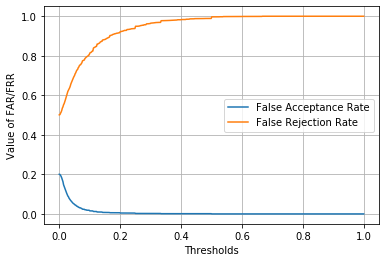

In [11]:
# far/frr_threshold
plt.plot(threshold_list, graph_far, label='False Acceptance Rate')
plt.plot(threshold_list, graph_frr, label='False Rejection Rate')
plt.xlabel("Thresholds")
plt.ylabel("Value of FAR/FRR")
plt.legend()
plt.grid()
plt.savefig('run1 eer.png')

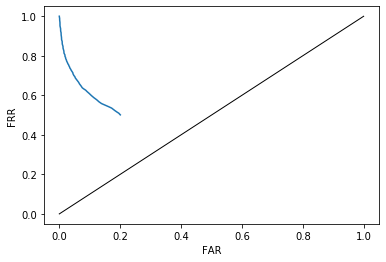

In [12]:
# roc
plt.plot(graph_far, graph_frr)
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 1)
plt.xlabel("FAR")
plt.ylabel("FRR")
plt.savefig('run1 roc.png')

In [13]:
df_perf_para= pd.DataFrame(columns = ['Threshold', 'FP Rate', 'TP Rate', 'FAR', 'FRR']) 
for th in threshold_list:
    new_row={'Threshold':th, 'FP Rate':dict_th[th][0], 'TP Rate':dict_th[th][1], 'FAR':dict_eer[th][0], 'FRR':dict_eer[th][1]}
    df_perf_para = df_perf_para.append(new_row, ignore_index = True) 

AttributeError: type object 'object' has no attribute 'dtype'

In [ ]:
df_perf_para['Accuracy']=[100-((df_perf_para['FAR'][i]+df_perf_para['FRR'][i])*100)/2 for i in df_perf_para.index]

In [ ]:
eer_index=np.argmin(np.abs(np.array(df_perf_para['FAR'])-np.array(df_perf_para['FRR'])))
print('FAR at Least Differing Error Rate= '+ str(df_perf_para.iloc[eer_index]['FAR']))
print('FRR at Least Differing Error Rate= '+ str(df_perf_para.iloc[eer_index]['FRR']))
print('Threshold at Least Differing Error Rate= '+ str(df_perf_para.iloc[eer_index]['Threshold']))
print('Accuracy= '+str(max(df_perf_para['Accuracy']))+'%')

In [ ]:
df_perf_para.to_csv('performance1.csv')

In [ ]:
df_perf_para